In [43]:
import numpy as np
import statsmodels.api as sm

import matplotlib.pyplot as plt
plt.rcParams['axes.facecolor'] = 'whitesmoke'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.linestyle'] = '--'

from scipy.stats import norm

# DAG examples



## Minimal Example

A simple causal relation, $Y$ being causally affected by $T$:

$T \rightarrow Y$

[2.99483539 0.06455178]
[3.76226247e-143 2.64535440e-007]


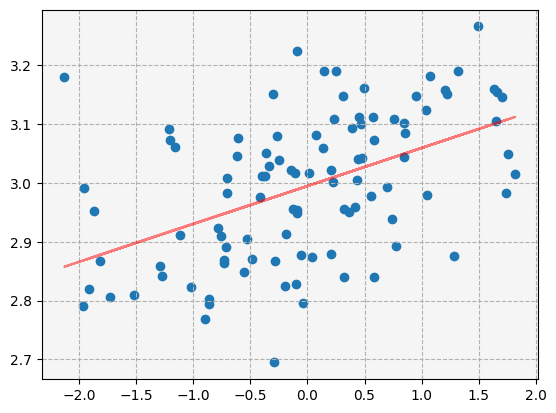

In [41]:
t = norm(0, 1).rvs(100)
y = 3 + 0.05 * t + norm(0, 0.1).rvs(100)

mod = sm.OLS(y, sm.add_constant(t)).fit()
print(mod.params)
print(mod.pvalues)

fig, ax = plt.subplots()
ax.scatter(t, y)
ax.plot(t, mod.predict(sm.add_constant(t)), color='red', alpha=.5)
plt.show()

## Minimal Mediator

$T \rightarrow M \rightarrow Y$

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     4228.
Date:                Wed, 02 Apr 2025   Prob (F-statistic):           4.48e-95
Time:                        20:28:02   Log-Likelihood:                 88.195
No. Observations:                 100   AIC:                            -170.4
Df Residuals:                      97   BIC:                            -162.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9804      0.109      8.984      0.0

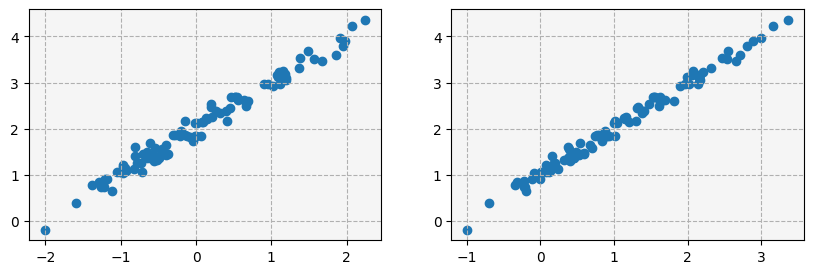

In [86]:
t = norm(0, 1).rvs(100)
m = 1 + t + norm(0, 0.1).rvs(100)
y = 1 + m + norm(0, 0.1).rvs(100)

X1 = sm.add_constant(np.array([t, m]).T)
X2 = sm.add_constant(t)

mod1 = sm.OLS(y, X1).fit()
print(mod1.summary())

mod2 = sm.OLS(y, X2).fit()
print(mod2.summary())

fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax[0].scatter(t, y)
ax[1].scatter(m, y)

plt.show()

Correct model should be regressing $Y$ on $T$, ignoring $M$

## Mediator with additional cause

$T \rightarrow M \rightarrow Y$

$X \rightarrow M$

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.036e+06
Date:                Wed, 02 Apr 2025   Prob (F-statistic):          2.12e-230
Time:                        20:45:27   Log-Likelihood:                 310.55
No. Observations:                 100   AIC:                            -613.1
Df Residuals:                      96   BIC:                            -602.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8664      0.103      8.410      0.0

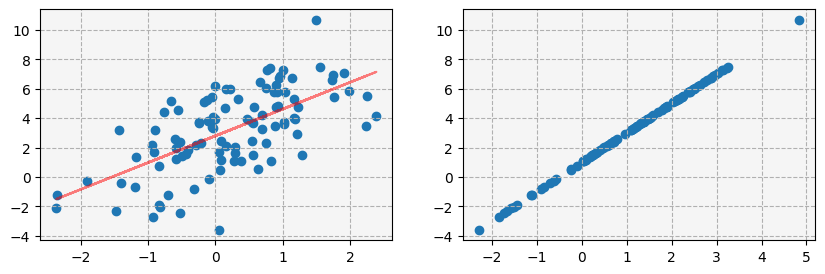

In [96]:
t = norm(0, 1).rvs(100)
x = norm(0, 1).rvs(100)
m = 1 + t + x + norm(0, 0.01).rvs(100)
y = 1 + 2 * m + norm(0, 0.01).rvs(100)
# -> y = 2 + t + x + noise

X1 = sm.add_constant(np.array([t, m, x]).T)
X2 = sm.add_constant(t)
X3 = sm.add_constant(np.array([t, x]).T)

mod1 = sm.OLS(y, X1).fit()
print(mod1.summary())

mod2 = sm.OLS(y, X2).fit()
print(mod2.summary())

mod3 = sm.OLS(y, X3).fit()
print(mod3.summary())

fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax[0].scatter(t, y)
ax[0].plot(t, mod2.predict(X2), color='red', alpha=.5)
ax[1].scatter(m, y)

plt.show()

Correct Model should be regressing $Y$ on $T$ and $X$, ignoring $M$.

## Minimal Collider

$T \rightarrow Y$

$T \rightarrow C \leftarrow Y$

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     165.6
Date:                Wed, 02 Apr 2025   Prob (F-statistic):           5.33e-32
Time:                        20:56:18   Log-Likelihood:                -102.41
No. Observations:                 100   AIC:                             210.8
Df Residuals:                      97   BIC:                             218.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5109      0.079      6.462      0.0

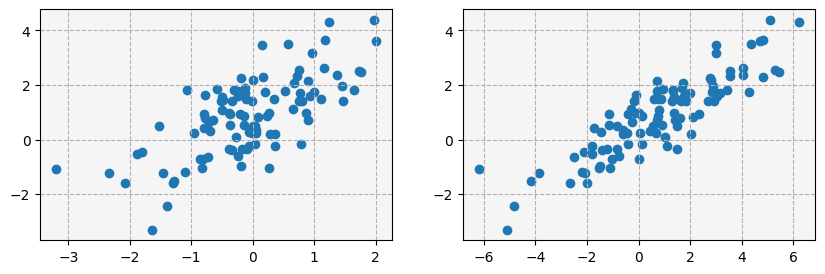

In [97]:
t = norm(0, 1).rvs(100)
y = 1 + t + norm(0, 1).rvs(100)
c = t + y + norm(0, 1).rvs(100)

X1 = sm.add_constant(np.array([t, c]).T)
X2 = sm.add_constant(t)

mod1 = sm.OLS(y, X1).fit()
print(mod1.summary())

mod2 = sm.OLS(y, X2).fit()
print(mod2.summary())

fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax[0].scatter(t, y)
ax[1].scatter(c, y)

plt.show()

nicely illustrates how controlling for the collider breaks the causal analysis